In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
risk_free=0.05  #5%
MONTH_IN_YEAR=12
class CAPM:
    def __init__(self,stocks,start_date,end_date):
        self.data=None
        self.stocks=stocks
        self.start_date=start_date
        self.end_date=end_date
    def download_data(self):
        stock_data={}
        for stock in self.stocks:
            dataset=yf.download(stock,self.start_date,self.end_date)
            # adj close take in account the company actions as stock split , divident etc and aplly into whole data 
            # there fore it is better to use adj close than close
            stock_data[stock]=dataset['Adj Close']
        return pd.DataFrame(stock_data)
    def initialize(self):
        stock_data=self.download_data()
        # over here we are dealing with monthly returns instead of daily returns
        stock_data=stock_data.resample('M').last()   
        self.data=pd.DataFrame({"s_adjclose":stock_data[self.stocks[0]],"m_adjclose":stock_data[self.stocks[1]]})
        #logarithmic monthly returns
        self.data[["s_returns","m_returns"]]=np.log((self.data[["s_adjclose","m_adjclose"]])/self.data[["s_adjclose","m_adjclose"]].shift(1))
        self.data=self.data[1:]
        print(self.data)
    def calculate_beta(self):
        # calcualte the covariance matrix that is symmetric and diagoal elements are varience
        covarience_matrix=np.cov(self.data['s_returns'],self.data['m_returns'])
        beta=covarience_matrix[0,1]/covarience_matrix[1,1]
        print("beta value=",beta)
    def regression(self):
        # udsing linear regression to find beta by assuming rf=0
        #[market_return , stock_return]- slope is beta
        beta , alpha = np.polyfit(self.data['m_returns'],self.data['s_returns'],deg=1)# deg specificies that u want linear, quadratic , cubic .... solution
        print("beta value=", beta)
        exected_return=risk_free+(beta*(self.data['m_returns'].mean()*MONTH_IN_YEAR-risk_free))
        print("expected anual returns", exected_return)
        self.regression_plot(alpha,beta)
    def regression_plot(self,alpha,beta):
        fig,axis=plt.subplots(1,figsize=(10,6))
        axis.scatter(self.data['m_returns'],self.data['s_returns'],label="data points")

        axis.plot(self.data['m_returns'],alpha+beta*self.data['m_returns'],label="CAPM LINE",color="red")
        plt.title("Capital Asset Pricing Model, finding alpha and beta")
        plt.xlabel("market returns $R_m$",fontsize=18)
        plt.ylabel("stock returns $S_m$",fontsize=18)
        plt.text(0.06,0.05,r'$R_a=\alpha+\beta*M_a$',fontsize=18)#latex formatting
        plt.legend()
        plt.legend()
        plt.grid(True)
        plt.show()

        
        
                     

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
            s_adjclose   m_adjclose  s_returns  m_returns
Date                                                     
2010-02-28   75.553177  1104.489990   0.042696   0.028115
2010-03-31   76.200813  1169.430054   0.008535   0.057133
2010-04-30   76.646439  1186.689941   0.005831   0.014651
2010-05-31   74.805748  1089.410034  -0.024308  -0.085532
2010-06-30   73.742729  1030.709961  -0.014312  -0.055388
...                ...          ...        ...        ...
2016-08-31  109.859596  2170.949951  -0.002293  -0.001220
2016-09-30  109.838875  2168.270020  -0.000189  -0.001235
2016-10-31  106.270912  2126.149902  -0.033023  -0.019617
2016-11-30  113.186714  2198.810059   0.063047   0.033604
2016-12-31  115.817139  2238.830078   0.022974   0.018037

[83 rows x 4 columns]
beta value= 0.713510778542625
beta value= 0.7135107785426249
expected anual returns 0

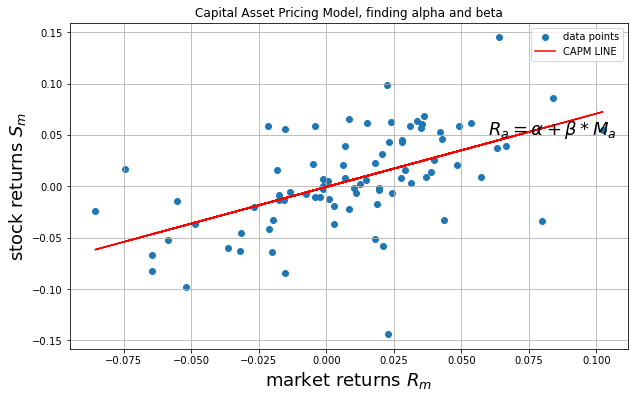

In [3]:
if __name__=="__main__":
    capm=CAPM(['IBM','^GSPC'],'2010-01-01','2017-01-01')
    capm.initialize()
    capm.calculate_beta()
    capm.regression()
    
